In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("PJME_hourly.csv")

In [5]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [6]:
df.dtypes

Datetime     object
PJME_MW     float64
dtype: object

In [7]:
# Data Preprocessing
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [8]:
df.dtypes

PJME_MW    float64
dtype: object

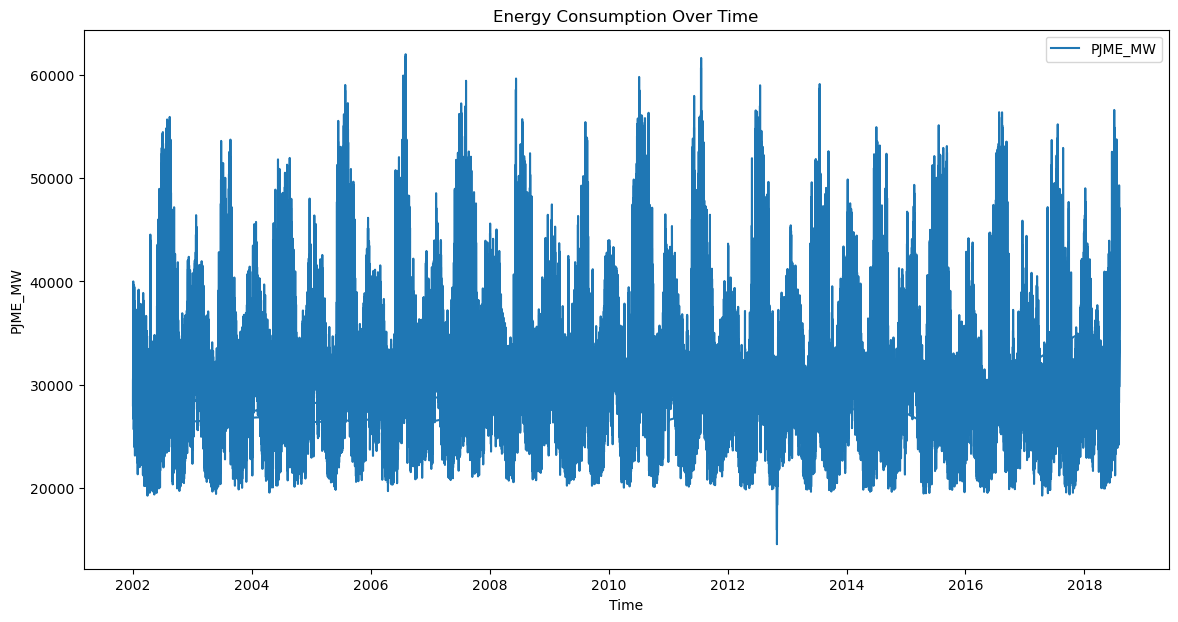

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df, label='PJME_MW')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()


## Inference :
- There is  an increase in power consumption within the year probably during extreme seasons when Summers required AC's.
- Also it could mean the winters were too cold so people used Heating devices more often.


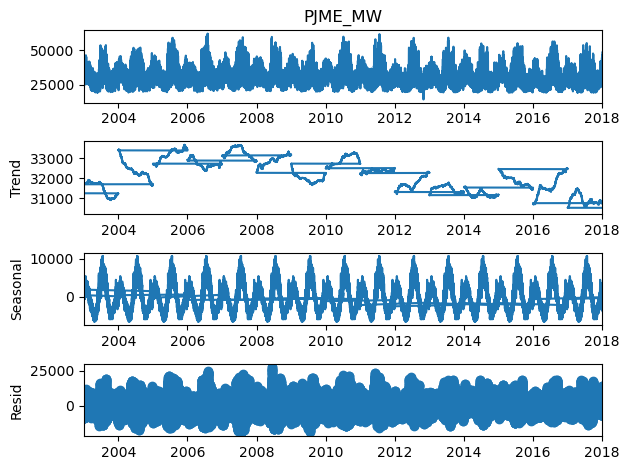

In [10]:
# Time Series Decomposition
decomposition = seasonal_decompose(df['PJME_MW'], model='additive', period=24*365)
decomposition.plot()
plt.show()

## Inference :
- The trend component graph uses parallel lines to provide confidence intervals.
- There seems to be overall decreasing trend.
- The seasonal component is present in this time series.


## Creating different time features to capture :
- Temporal trends: seasonal, cyclical, long term trend
- Improving model performance and addressing non stationarity of data.

In [11]:
# Create Time Series Features
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_year'] = df.index.dayofyear
    df['day_of_month'] = df.index.day
    df['week_of_year'] = df.index.isocalendar().week
    return df

df1 = create_features(df)
df1.head()

,PJME_MW,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


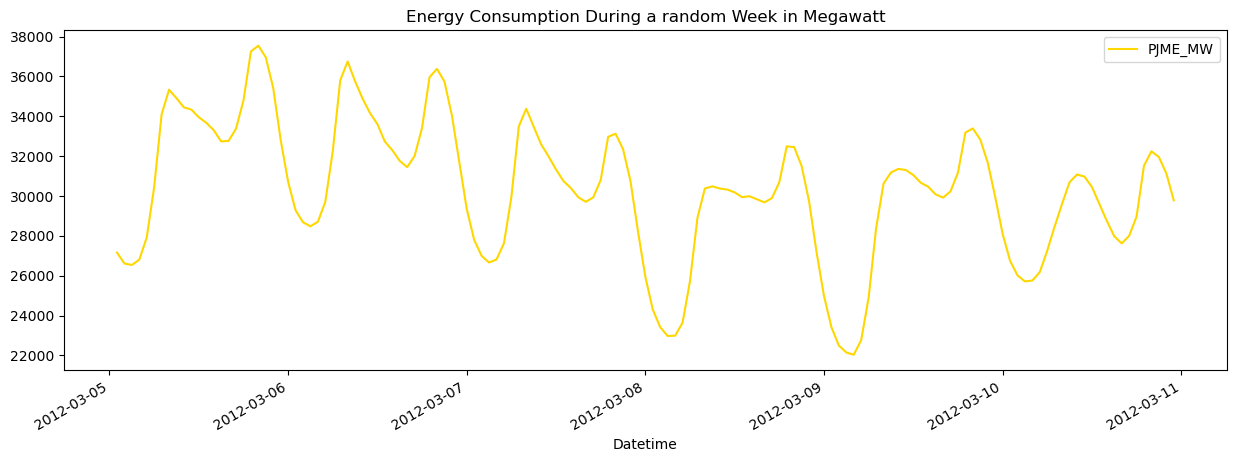

In [12]:
#plotting energy consumption inside a random week

En_Week = df.loc[(df.index > '03-05-2012') & (df.index < '03-11-2012')]  # from Monday to Sunday
En_Week.plot(figsize=(15, 5),  color= "Gold", title='Energy Consumption During a random Week in Megawatt')
plt.show()

## Inferences :
- As the day progresses energy consumption is at peak, as night progresses power consumption drops.
- The power consumption increases as the week starts and drops as it ends.
- Higher energy consumption during weekdays and starts to fall during weekends.
- **This represents seasonality  and non-stationarity of data.**
 

In [13]:
# Years With The Highest Energy Consumption in Megawatt 
df_year = df1.groupby(['year']).sum()['PJME_MW']
df_year.sort_values( ascending=False).head()

year
2007    294386758.0
2005    291733172.0
2010    289866969.0
2008    289187689.0
2006    283840384.0
Name: PJME_MW, dtype: float64

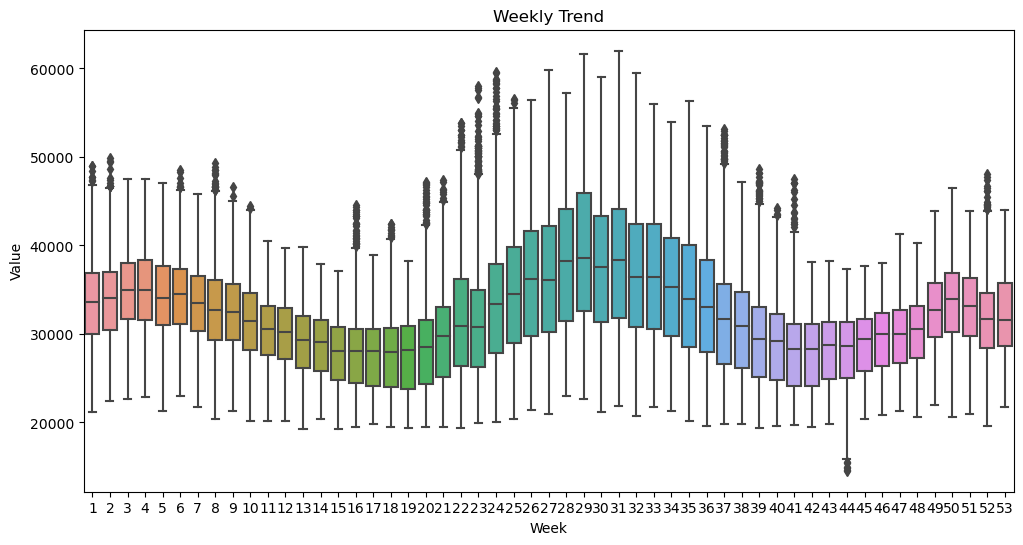

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='week_of_year', y='PJME_MW', data=df1)
plt.xlabel('Week')
plt.ylabel('Value')
plt.title('Weekly Trend')
plt.show()

### There is a seasonal growth in energy consumption during summer weeks and winter.

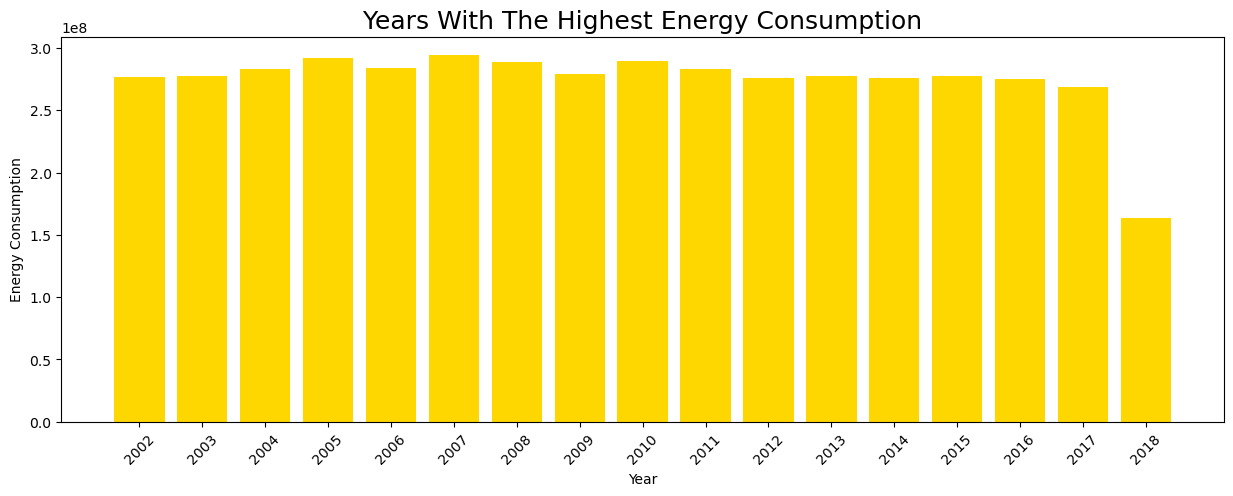

In [15]:
# Years With The Highest Energy Consumption in Megawatt 
Year_ = range(2002,2019)
plt.figure(figsize=(15, 5))
plt.bar(Year_,df_year,color= "Gold")
plt.xticks(Year_)
plt.ylabel('Energy Consumption')
plt.xlabel('Year')
plt.title(' Years With The Highest Energy Consumption ', fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [16]:
# Months With The Highest Energy Consumption in Megawatt
df_month = df1.groupby(['month']).sum()['PJME_MW']
df_month.sort_values( ascending=False).head()

month
7     479131193.0
8     437431506.0
1     434339038.0
6     413856422.0
12    388945376.0
Name: PJME_MW, dtype: float64

In [17]:
# Hours With The Highest Energy Consumption in Megawatt
df_hour = df1.groupby(['hour']).sum()['PJME_MW']
df_hour.sort_values( ascending=False).head()

hour
19    220672524.0
18    220644061.0
20    218735238.0
21    216519325.0
17    215640880.0
Name: PJME_MW, dtype: float64

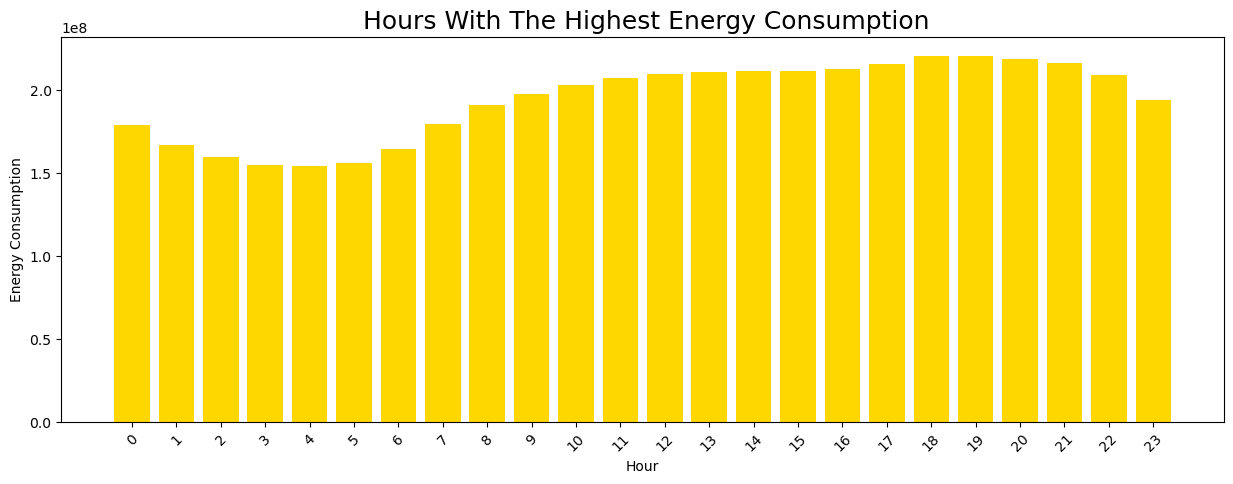

In [18]:
# Hours With The Highest Energy Consumption in Megawatt
hour_ = range(0,24)
plt.figure(figsize=(15, 5))
plt.bar(hour_,df_hour, color='gold')
plt.xticks(hour_)
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title(' Hours With The Highest Energy Consumption', fontsize=18)
plt.xticks(rotation=45)
plt.show()

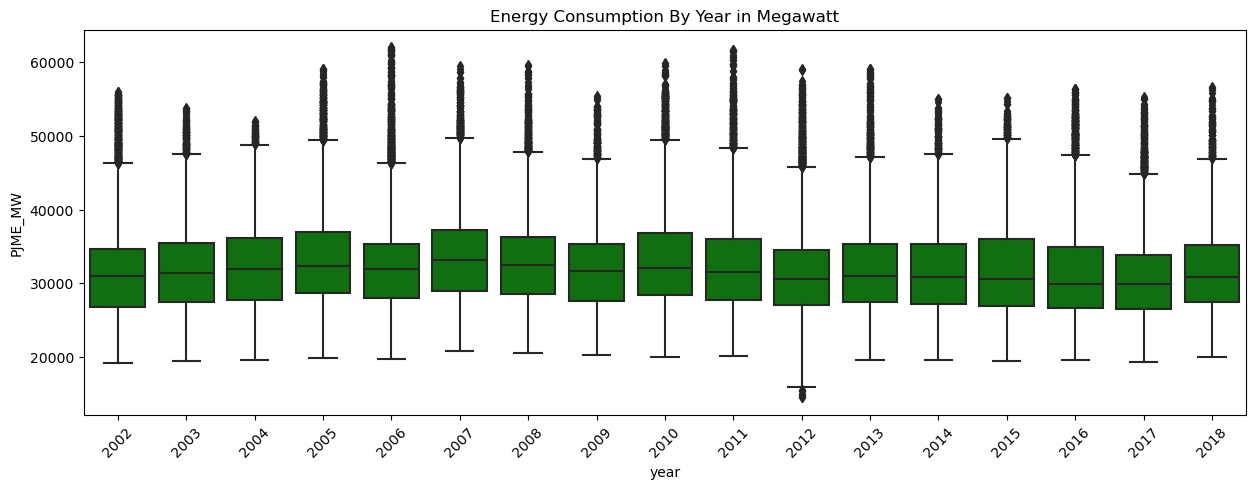

In [19]:
# 
# Analysis : Feature - Target Relationship
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x='year', y='PJME_MW', color ='green')
ax.set_title('Energy Consumption By Year in Megawatt')
plt.xticks(rotation=45)
plt.show()

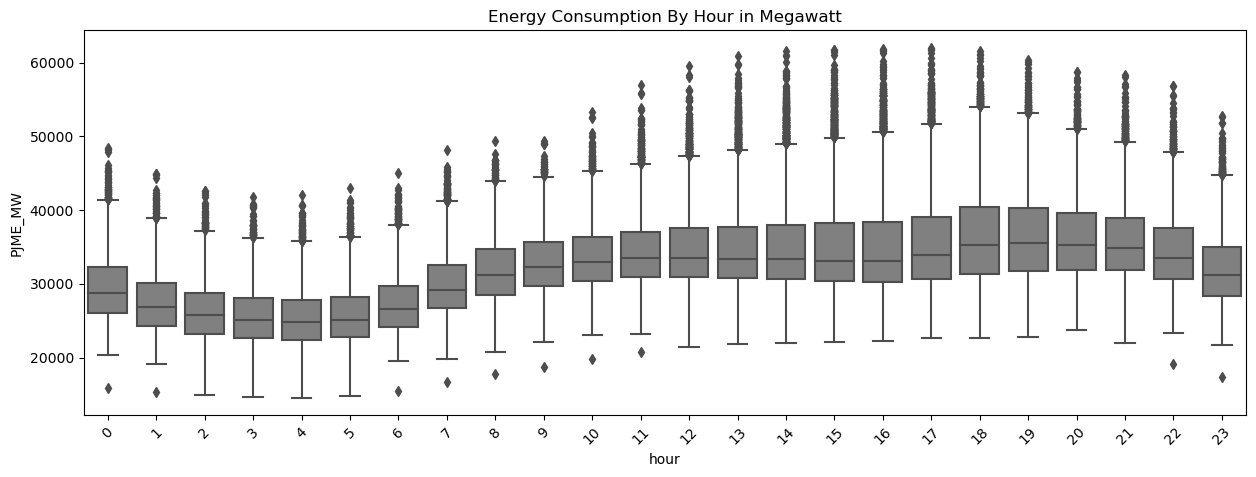

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x='hour', y='PJME_MW', color ='grey')
ax.set_title('Energy Consumption By Hour in Megawatt')
plt.xticks(rotation=45)
plt.show()

### As people progress towards the day , the energy consumption increases and falls down when people sleep and not that many appliances are working.
- **The visual patterns have shown seasonality in energy consumption implying that the data is non-stationary.**


## Checking for **Stationarity** of the time series:
- To check the stability of time series if the data variable varies with changing times.
- A stationarity test in time series analysis is used to determine whether the statistical properties of a time series, such as its mean and variance, remain constant over time.
- Stationarity is an important property because many time series forecasting models, such as ARIMA, assume that the time series is stationary.


### Using Autocorrelation Function plots : 

In [21]:
from statsmodels.graphics.tsaplots import plot_acf # type: ignore

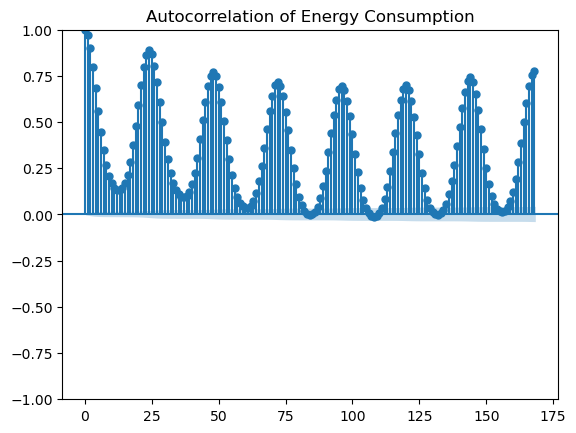

In [22]:
# Plot the Autocorrelation Function (ACF) for 'PJME_MW' column up to 168 lags (1 week)
plot_acf(df['PJME_MW'], lags=168)  # Analyzing up to a week's worth of hourly data
plt.title('Autocorrelation of Energy Consumption')
plt.show()

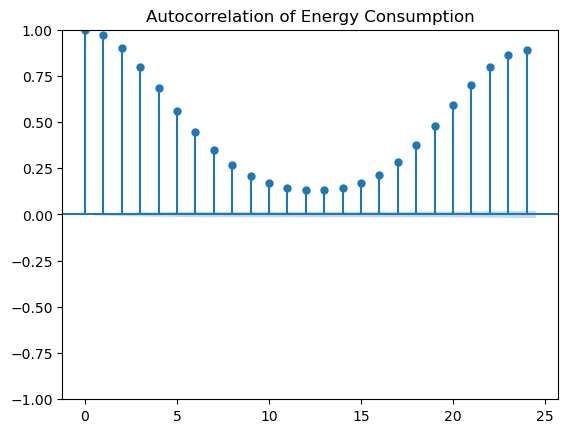

In [23]:
# Plot the Autocorrelation Function (ACF) for 'PJME_MW' column up to 24 lags (1 day)
plot_acf(df['PJME_MW'], lags=24,alpha= 0.05)  # Analyzing up to a week's worth of hourly data
plt.title('Autocorrelation of Energy Consumption')
plt.show()

<Figure size 1200x2400 with 0 Axes>

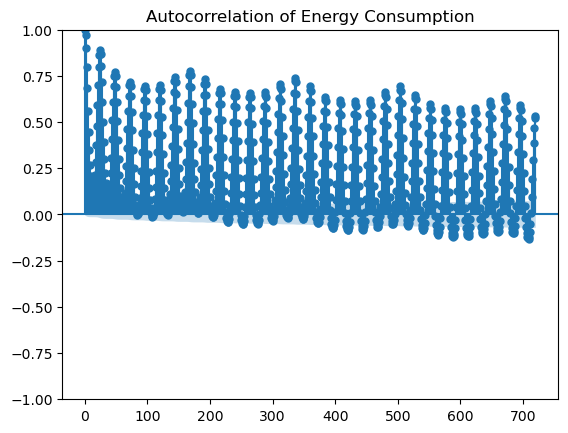

In [24]:
# Plot the Autocorrelation Function (ACF) for 'PJME_MW' column up to 720 lags (1 month )
plt.figure(figsize=(12,24))
plot_acf(df['PJME_MW'], lags=720,alpha= 0.05)  # Analyzing up to a month's worth of hourly data
plt.title('Autocorrelation of Energy Consumption')
plt.show()

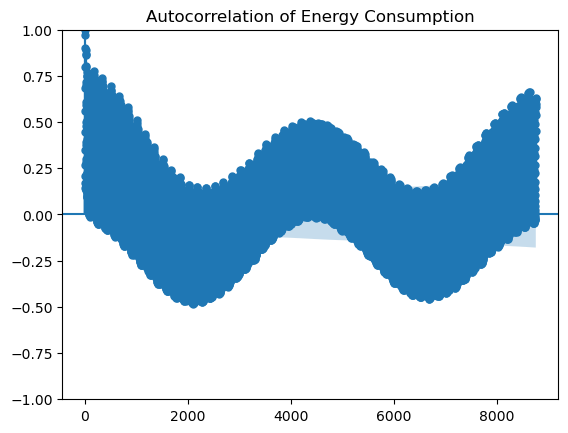

In [25]:
# Plot the Autocorrelation Function (ACF) for 'PJME_MW' column up to 8760 lags yearly 
plot_acf(df['PJME_MW'], lags=8760,alpha= 0.05)  # Analyzing up to a year's worth of hourly data
plt.title('Autocorrelation of Energy Consumption')
plt.show()

#### **This also shows daily cycle of energy consumption**
- The majority of the values of the autocorrelation are not statistically significant.

# Lets use the aggregated data for daily consumption for further analysis.

In [63]:
daily_data = df['PJME_MW'].resample('D').sum()

In [64]:
daily_data.head()

Datetime
2002-01-01    714857.0
2002-01-02    822277.0
2002-01-03    828285.0
2002-01-04    809171.0
2002-01-05    729723.0
Freq: D, Name: PJME_MW, dtype: float64

In [28]:
print("Shape of original dataframe:",df.shape)
print("Shape of daily consumption data:",daily_data.shape)

Shape of original dataframe: (145366, 1)
Shape of daily consumption data: (6059,)


### The Null Hypothesis (H0) of the ADF test is that the time series is non-stationary, meaning it has a unit root. If the test statistic is less than the critical values, we reject the null hypothesis and conclude that the series is stationary.

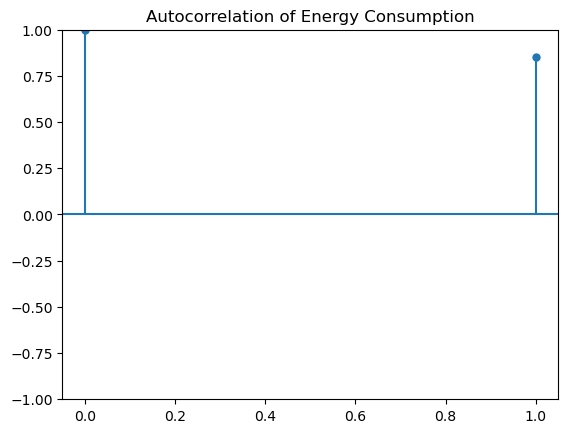

In [29]:
# Plot the Autocorrelation Function (ACF) for daily consumption  
plot_acf(daily_data, lags=1,alpha= 0.05)  # Analyzing daily data
plt.title('Autocorrelation of Energy Consumption')
plt.show()

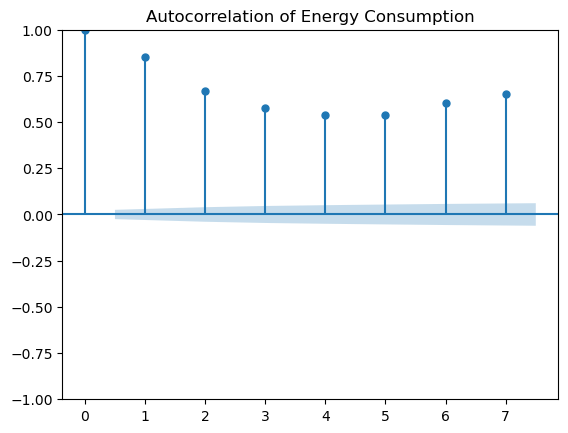

In [30]:
# Plot the Autocorrelation Function (ACF) for daily consumption  
plot_acf(daily_data, lags=7,alpha= 0.05)  # Analyzing weekly data
plt.title('Autocorrelation of Energy Consumption')
plt.show()

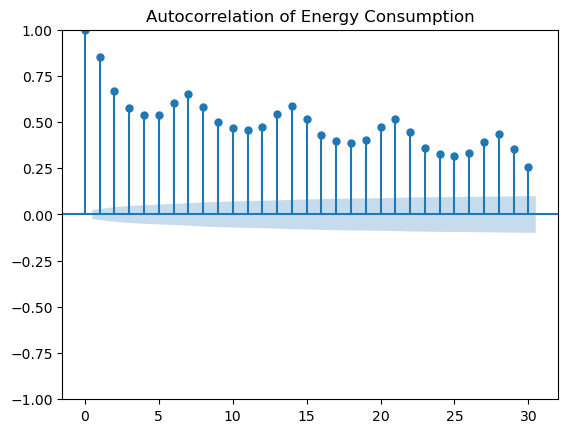

In [31]:
# Plot the Autocorrelation Function (ACF) for daily consumption  
plot_acf(daily_data, lags=30,alpha= 0.05)  # Analyzing monthly lags
plt.title('Autocorrelation of Energy Consumption')
plt.show()

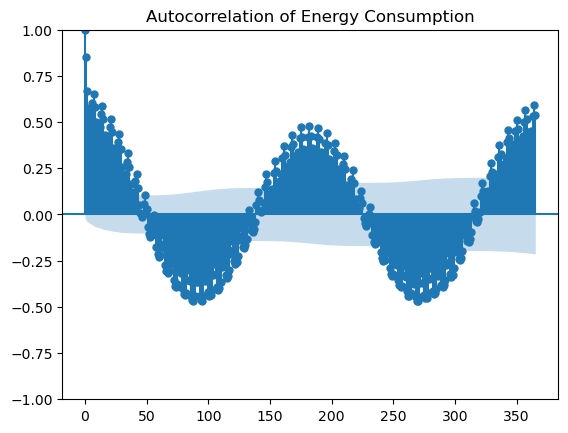

In [32]:
# Plot the Autocorrelation Function (ACF) for daily consumption  
plot_acf(daily_data, lags=365,alpha= 0.05)  # Analyzing yearly lags
plt.title('Autocorrelation of Energy Consumption')
plt.show()

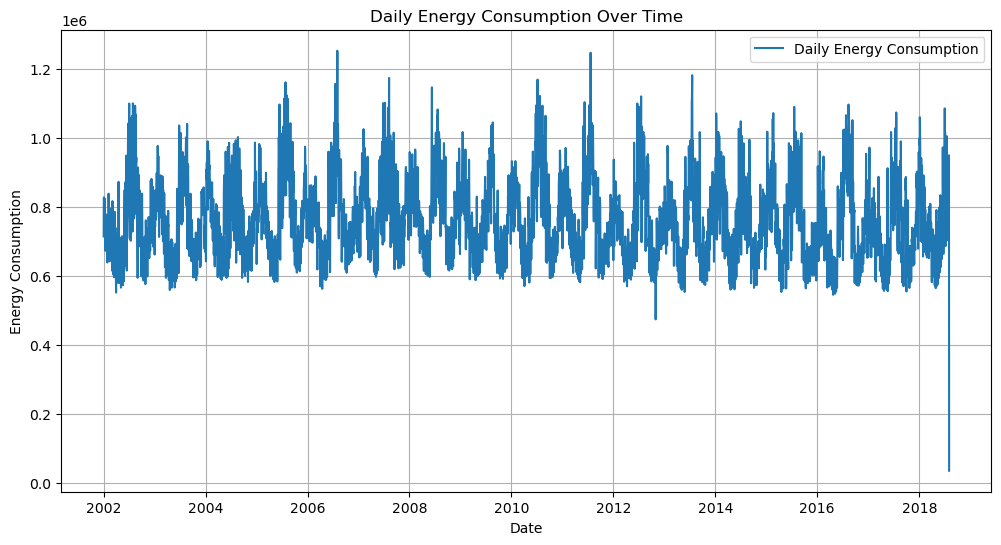

In [33]:
# Plotting the daily data to see if there are trends 

plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Daily Energy Consumption')
plt.title('Daily Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

## The graph shows a band of constant spikes and depressions that might indicate there are certain seasonal components associated with extreme summers and winters.

### Checking for stationarity of the daily data. 

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
# Perform the Augmented Dickey-Fuller (ADF) test on daily data
# for 45 days lag period 
adf_result_daily = adfuller(daily_data,maxlag= 45, regression = "ctt")

# Print the results for weekly data
print('ADF Statistic (daily):', adf_result_daily[0])
print('p-value (daily):', adf_result_daily[1])
print('Critical Values (daily):')
for key, value in adf_result_daily[4].items():
    print(f'    {key}: {value}')



ADF Statistic (daily): -11.679227688298479
p-value (daily): 8.382288224675248e-19
Critical Values (daily):
    1%: -4.373058183297133
    5%: -3.833372501320076
    10%: -3.553868761353291


## The data is  most likely stationary as the p-value << 0.05 , that makes us reject the null hypothesis of the ADF test.

### ACF and PACF analysis

c:\Users\Gurkirtan Singh\anaconda3\anaconda new folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


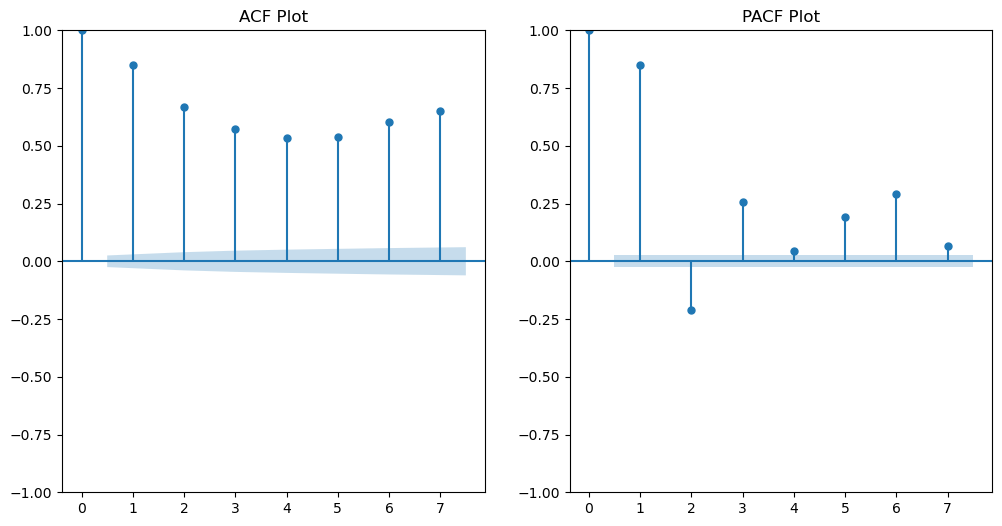

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(daily_data,lags = 7,ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(daily_data,lags= 7,ax=plt.gca())
plt.title('PACF Plot')

plt.show()


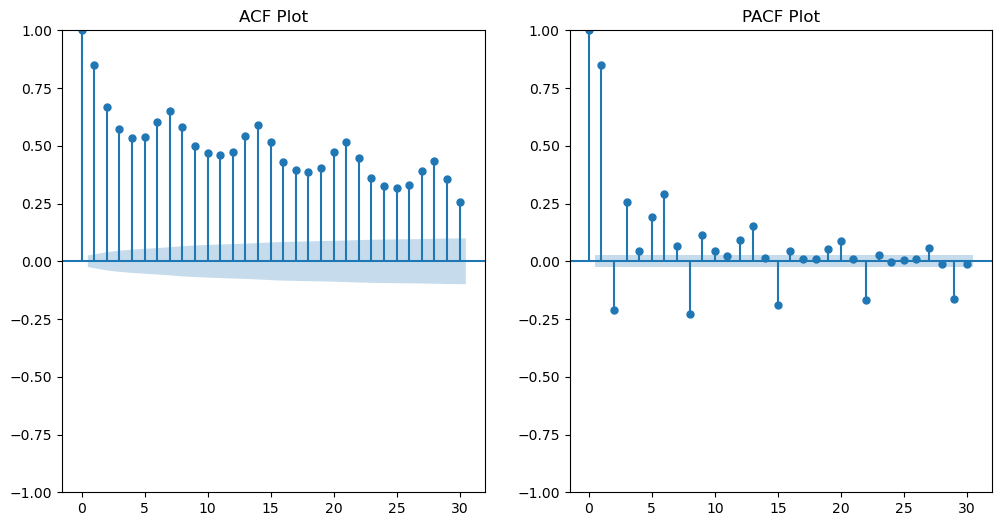

In [37]:
# For monthly seasonality
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(daily_data,lags = 30 ,ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(daily_data,lags= 30,ax=plt.gca())
plt.title('PACF Plot')

plt.show()


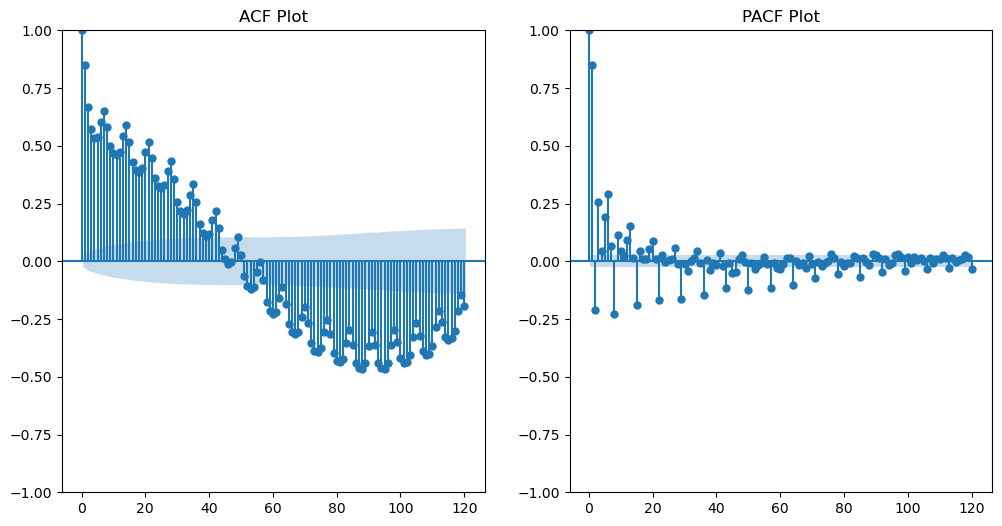

In [38]:
# For yearly lags
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(daily_data,lags = 120,ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(daily_data,lags= 120,ax=plt.gca())
plt.title('PACF Plot')


plt.show()


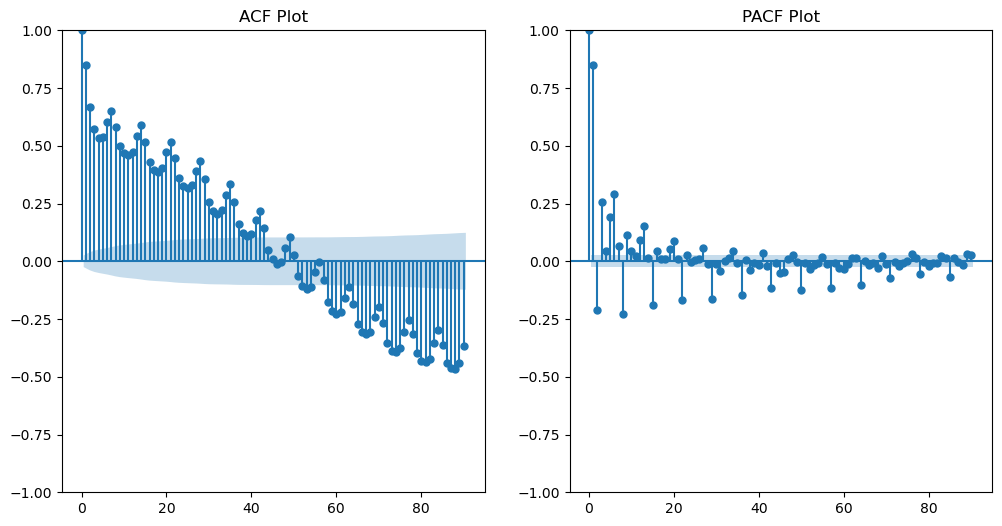

In [39]:
# For quarterly lags
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(daily_data,lags = 90,ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(daily_data,lags= 90,ax=plt.gca())
plt.title('PACF Plot')


plt.show()

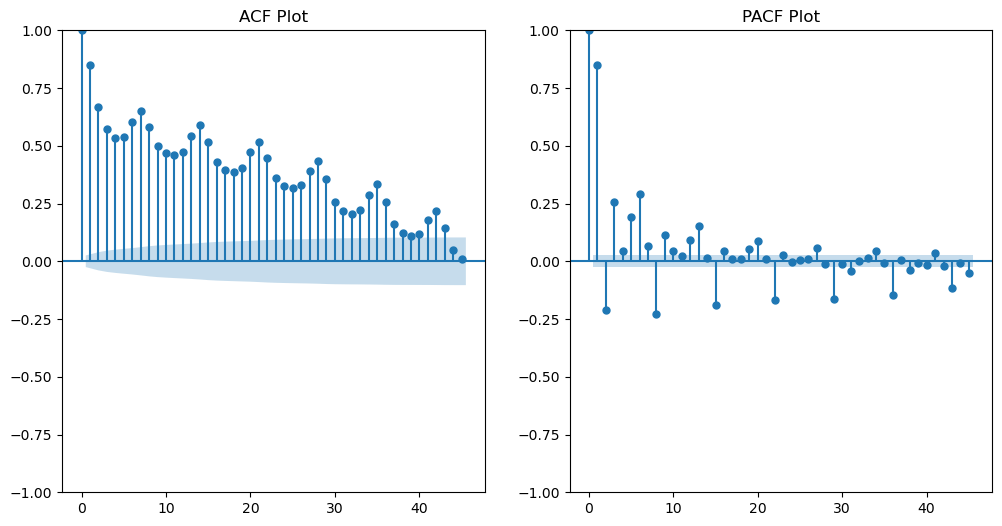

In [40]:
# For 45 days lags
# For yearly lags
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(daily_data,lags = 45,ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(daily_data,lags= 45,ax=plt.gca())
plt.title('PACF Plot')


plt.show()

## Since there lies a strong seasonality in the data , we have and there is staionarity,
- Also SARIMA models are based on statistical properties like mean, variance, and autocorrelation structures, so scaling is not required as much you might think.
- **The Parameters of the SARIMA MODEL:**
    - p (order of the autoregressive part) =
    - d(order of differencing needed to make the series stationary) =
    - 𝑞(order of the moving average part)= 
 

## Most of the ACF and PACF values lie outside the thin blue band indicating that they are in the 95% confidence interval and are therefore significant.
- The thinn blue band also indicates that the standard error of the model is quite low.


# Forecasting for daily usage : As the daily data is stationary , lets build models.

### the autoregressive (AR) part is a linear function of past values (lags) of the series, and the moving average (MA) part is a linear function of past error terms.
- SARIMA extends ARIMA by adding three additional parameters to model seasonality:
𝑃
P: Seasonal autoregressive order.
𝐷
D: Seasonal differencing order.
𝑄
Q: Seasonal moving average order

c:\Users\Gurkirtan Singh\anaconda3\anaconda new folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                       
Dep. Variable:                               PJME_MW   No. Observations:                 6059
Model:             SARIMAX(11, 0, 2)x(1, 0, [1], 45)   Log Likelihood              -74045.108
Date:                               Thu, 12 Sep 2024   AIC                         148122.217
Time:                                       18:05:20   BIC                         148229.565
Sample:                                   01-01-2002   HQIC                        148159.477
                                        - 08-03-2018                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8712      0.064     13.534      0.000       0.745       0.997
ar.L2      

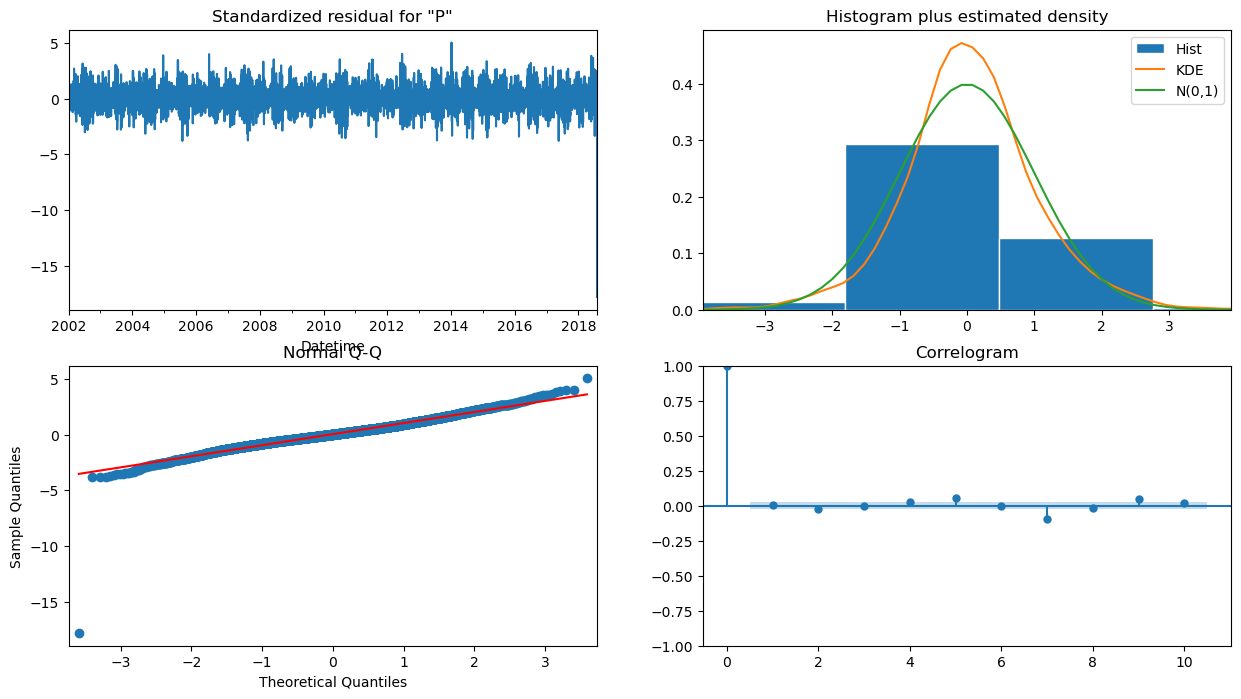

In [42]:
# Fitting the SARIMA model
# Define SARIMA Model with chosen parameters
model = SARIMAX(daily_data,
                order=(11,0,2),  # (p, d, q)
                seasonal_order=(1,0,1,45),  # (P, D, Q, m)
                enforce_stationarity=True,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Print model summary
print(sarima_result.summary())

# Plot diagnostics
sarima_result.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecasting
n_forecast_days = 30  # Example: forecast for the next 30 days
forecast = sarima_result.get_forecast(steps=n_forecast_days)
forecast_index = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast_days, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)






In [49]:
print(forecast_series.head(30))

2018-08-04   -114705.327390
2018-08-05    189156.972423
2018-08-06    431883.077862
2018-08-07    590420.554738
2018-08-08    764436.391954
2018-08-09    792373.337233
2018-08-10    411485.238002
2018-08-11    325676.006983
2018-08-12    511402.937090
2018-08-13    617257.017200
2018-08-14    632395.411932
2018-08-15    670113.276949
2018-08-16    641748.270235
2018-08-17    449790.525080
2018-08-18    400432.168021
2018-08-19    513473.750036
2018-08-20    576610.957515
2018-08-21    572861.497532
2018-08-22    583609.931320
2018-08-23    568839.149718
2018-08-24    484468.562152
2018-08-25    466101.176069
2018-08-26    531286.885890
2018-08-27    567777.400464
2018-08-28    557141.703216
2018-08-29    555547.318808
2018-08-30    546252.350559
2018-08-31    507747.027258
2018-09-01    498248.132417
2018-09-02    533272.645054
Freq: D, Name: predicted_mean, dtype: float64


In [51]:
forecast.conf_int()

,lower PJME_MW,upper PJME_MW
2018-08-04,-211320.546472,-18090.108307
2018-08-05,44972.722937,333341.221909
2018-08-06,271698.855168,592067.300556
2018-08-07,424395.756095,756445.353380
2018-08-08,595976.044194,932896.739714
2018-08-09,623300.461506,961446.212959
2018-08-10,242036.093446,580934.382558
2018-08-11,148900.704557,502451.309410
2018-08-12,325708.222107,697097.652073
2018-08-13,428232.403234,806281.631165


In [1]:
#! pip install prophet

     ---------------------------------------- 13.3/13.3 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00


In [53]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [65]:
p_df = daily_data

In [66]:
p_df.head()

Datetime
2002-01-01    714857.0
2002-01-02    822277.0
2002-01-03    828285.0
2002-01-04    809171.0
2002-01-05    729723.0
Freq: D, Name: PJME_MW, dtype: float64

In [67]:
p_df.dropna(inplace= True)


In [68]:
daily_data = daily_data.reset_index()

In [69]:
daily_data.head()

,Datetime,PJME_MW
0,2002-01-01,714857.0
1,2002-01-02,822277.0
2,2002-01-03,828285.0
3,2002-01-04,809171.0
4,2002-01-05,729723.0


In [70]:
daily_data.columns = ['ds','y']
     

daily_data['ds'] = pd.to_datetime(daily_data['ds'])
daily_data.tail()

,ds,y
6054,2018-07-30,790978.0
6055,2018-07-31,828938.0
6056,2018-08-01,941539.0
6057,2018-08-02,950233.0
6058,2018-08-03,35486.0


In [77]:
train = daily_data.iloc[:len(daily_data)-365]
test = daily_data.iloc[len(daily_data)-365:]

## Training and making predictions using prophet model  :
- based on an additive decomposition model, separating the time series into three main components: trend, seasonality and vacations (i.e. exceptional events).

- The presence of a trend component enables it to handle long-term evolutions, while the seasonality model helps capture periodic variations. What’s more, public holidays and other events are automatically integrated to improve prediction accuracy!

In [78]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

19:32:15 - cmdstanpy - INFO - Chain [1] start processing
19:32:16 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6054,2018-07-30,733111.417471,808552.335614,9.870086e+05,729042.802695,737183.472047,168152.868667,168152.868667,168152.868667,14760.630510,14760.630510,14760.630510,153392.238157,153392.238157,153392.238157,0.0,0.0,0.0,901264.286138
6055,2018-07-31,733094.259998,824373.676743,1.006938e+06,728971.439559,737182.389531,179628.366450,179628.366450,179628.366450,28878.399197,28878.399197,28878.399197,150749.967253,150749.967253,150749.967253,0.0,0.0,0.0,912722.626447
6056,2018-08-01,733077.102524,823309.474973,9.941328e+05,728908.699246,737181.307015,176697.839160,176697.839160,176697.839160,28680.973995,28680.973995,28680.973995,148016.865165,148016.865165,148016.865165,0.0,0.0,0.0,909774.941684
6057,2018-08-02,733059.945051,812887.086053,9.898936e+05,728867.298707,737209.125433,169608.774704,169608.774704,169608.774704,24374.281424,24374.281424,24374.281424,145234.493280,145234.493280,145234.493280,0.0,0.0,0.0,902668.719755
6058,2018-08-03,733042.787577,801914.835484,9.783789e+05,728833.424402,737208.692217,157178.036116,157178.036116,157178.036116,14737.071145,14737.071145,14737.071145,142440.964971,142440.964971,142440.964971,0.0,0.0,0.0,890220.823693


In [81]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6054,2018-07-30,901264.286138,808552.335614,9.870086e+05
6055,2018-07-31,912722.626447,824373.676743,1.006938e+06
6056,2018-08-01,909774.941684,823309.474973,9.941328e+05
6057,2018-08-02,902668.719755,812887.086053,9.898936e+05
6058,2018-08-03,890220.823693,801914.835484,9.783789e+05


In [82]:
test.tail()

,ds,y
6054,2018-07-30,790978.0
6055,2018-07-31,828938.0
6056,2018-08-01,941539.0
6057,2018-08-02,950233.0
6058,2018-08-03,35486.0


In [83]:
plot_plotly(m ,forecast)

In [84]:
plot_components_plotly(m, forecast)


## Evaluating Model

In [85]:
from statsmodels.tools.eval_measures import rmse

In [86]:
predictions = forecast.iloc[-365:]['yhat']

In [87]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  94446.10943239681
Mean Value of Test Dataset: 746416.3150684931


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [90]:
# Calculate accuracy metrics
mae = mean_absolute_error(test['y'], predictions)
mse = mean_squared_error(test['y'], predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['y'], predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Absolute Error (MAE): 63850.52258808642
Mean Squared Error (MSE): 8920067586.916273
Root Mean Squared Error (RMSE): 94446.10943239681
Mean Absolute Percentage Error (MAPE): 0.14544837494627022


### MAPE of 14.54%, Prophet model is performing reasonably well